In [15]:
from samhi.inference.inference import Inference
import numpy as np
from PIL import Image
import cv2

In [4]:
config = {
    "device": "cuda",
    "model_dir": "/vol/data/models/",
    "model_name": "model-ap0xl4l1:v19"
}
inference = Inference(config)

In [8]:
image_name = "/home/ubuntu/thesis/data/CPM_15_and_17/cpm15/Images/image_01.png"
img = Image.open(image_name)
img_np = np.array(img)

In [9]:
masks, prompts = inference.segment_automatically(img_np)

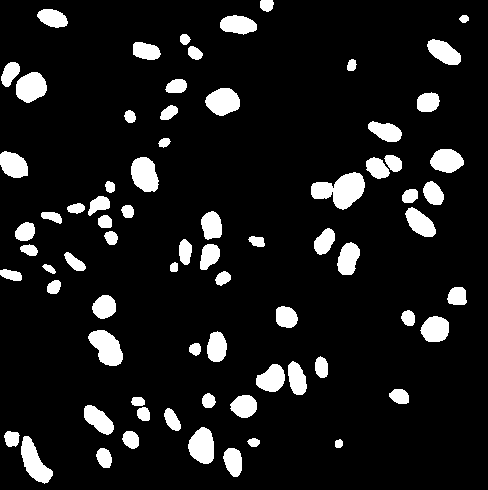

In [13]:
masks_binary = masks > 0
Image.fromarray(masks_binary.astype(np.uint8) * 255)

In [14]:
masks.shape

(490, 488)

In [46]:
h, w = masks_binary.shape[-2:]
color = np.array([30, 144, 255]).astype(np.uint8)
colored_mask = masks_binary.reshape(h, w, 1) * color.reshape(1, 1, -1)
colored_mask = colored_mask.astype(np.uint8)
overlay =  np.where(colored_mask > 0, 0.4 * img_np, img_np)
overlay = overlay.astype(np.uint8)
overlay = cv2.addWeighted(overlay, 1.0, colored_mask, 0.6, 0.0)
Image.fromarray(overlay).save("/home/ubuntu/thesis/samples/presi/overlay.png")

In [18]:
gt = Image.open("/home/ubuntu/thesis/data/CPM_15_and_17/cpm15/Labels_png/image_01.png")

In [22]:
gt_np = np.array(gt)
gt_binary = gt_np > 0

In [47]:
h, w = gt_binary.shape[-2:]
color = np.array([30, 144, 255]).astype(np.uint8)
colored_mask = gt_binary.reshape(h, w, 1) * color.reshape(1, 1, -1)
colored_mask = colored_mask.astype(np.uint8)
gt_overlay =  np.where(colored_mask > 0, 0.4 * img_np, img_np)
gt_overlay = gt_overlay.astype(np.uint8)
gt_overlay = cv2.addWeighted(gt_overlay, 1.0, colored_mask, 0.6, 0.0)
Image.fromarray(gt_overlay).save("/home/ubuntu/thesis/samples/presi/gt_overlay.png")

In [55]:
points = np.zeros_like(gt_np)
h, w = gt_np.shape
for i in np.unique(gt_np):
    if i == 0:
        continue
    y_indices, x_indices = np.where(gt_np == i)
    index = np.random.choice(len(x_indices))
    x = x_indices[index]
    y = y_indices[index]
    offset = 3
    y_min = max(0, y - offset)
    y_max = min(h, y + offset)
    x_min = max(0, x - offset)
    x_max = min(w, x + offset)
    points[y_min:y_max, x_min:x_max] = 1

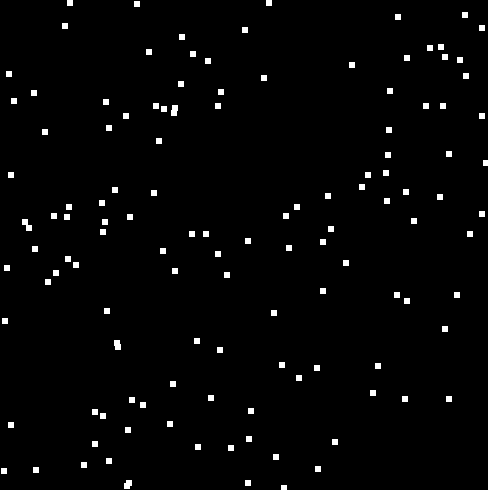

In [37]:
Image.fromarray(points.astype(np.uint8) * 255)

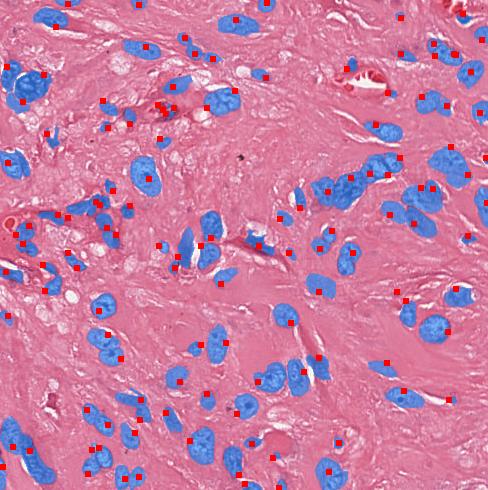

In [40]:
h, w = gt_binary.shape[-2:]
color = np.array([30, 144, 255]).astype(np.uint8)
colored_mask = gt_binary.reshape(h, w, 1) * color.reshape(1, 1, -1)
colored_mask = colored_mask.astype(np.uint8)
gt_overlay =  np.where(colored_mask > 0, 0.4 * img_np, img_np)
gt_overlay = gt_overlay.astype(np.uint8)
gt_overlay = cv2.addWeighted(gt_overlay, 1.0, colored_mask, 0.6, 0.0)
gt_overlay[:,:,0] = np.where(points > 0, 255, gt_overlay[:,:,0])
gt_overlay[:,:,1] = np.where(points > 0, 0, gt_overlay[:,:,1])
gt_overlay[:,:,2] = np.where(points > 0, 0, gt_overlay[:,:,2])
Image.fromarray(gt_overlay)

In [56]:
h, w = masks_binary.shape[-2:]
color = np.array([30, 144, 255]).astype(np.uint8)
colored_mask = masks_binary.reshape(h, w, 1) * color.reshape(1, 1, -1)
colored_mask = colored_mask.astype(np.uint8)
overlay =  np.where(colored_mask > 0, 0.4 * img_np, img_np)
overlay = overlay.astype(np.uint8)
overlay = cv2.addWeighted(overlay, 1.0, colored_mask, 0.6, 0.0)
overlay[:,:,0] = np.where(points > 0, 0, overlay[:,:,0])
overlay[:,:,1] = np.where(points > 0, 255, overlay[:,:,1])
overlay[:,:,2] = np.where(points > 0, 0, overlay[:,:,2])
Image.fromarray(overlay).save("/home/ubuntu/thesis/samples/presi/points_overlay.png")

In [58]:
boxes = np.zeros_like(gt_np)
h, w = gt_np.shape
for i in np.unique(gt_np):
    if i == 0:
        continue
    y_indices, x_indices = np.where(gt_np == i)
    y_min = max(0, min(y_indices))
    y_max = min(h, max(y_indices))
    x_min = max(0, min(x_indices))
    x_max = min(w, max(x_indices))
    boxes[y_min, x_min:x_max] = 1
    boxes[y_max, x_min:x_max] = 1
    boxes[y_min:y_max, x_min] = 1
    boxes[y_min:y_max, x_max] = 1

In [59]:
h, w = masks_binary.shape[-2:]
color = np.array([30, 144, 255]).astype(np.uint8)
colored_mask = masks_binary.reshape(h, w, 1) * color.reshape(1, 1, -1)
colored_mask = colored_mask.astype(np.uint8)
overlay =  np.where(colored_mask > 0, 0.4 * img_np, img_np)
overlay = overlay.astype(np.uint8)
overlay = cv2.addWeighted(overlay, 1.0, colored_mask, 0.6, 0.0)
overlay[:,:,0] = np.where(boxes > 0, 0, overlay[:,:,0])
overlay[:,:,1] = np.where(boxes > 0, 255, overlay[:,:,1])
overlay[:,:,2] = np.where(boxes > 0, 0, overlay[:,:,2])
Image.fromarray(overlay).save("/home/ubuntu/thesis/samples/presi/boxes_overlay.png")

In [50]:
max(max(y_indices)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()